###### Data Mining Project
###### Email : perryliutx@gmail.com
###### Zhicheng Liu

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt

# Importing from CSV file

In [3]:
breach = pd.read_csv(filepath_or_buffer="D:\\Temp\\Data Breaches - Raw Data.csv")

# Data Cleansing & Validation

In [4]:
breach.head()

,Entity,alternative name,records lost,YEAR,story,SECTOR,METHOD,interesting story,DATA SENSITIVITY,DISPLAYED RECORDS,Unnamed: 10,source name,1st source link,2nd source link
0,NaN,NaN,NaN,year story broke,NaN,web\nhealthcare\napp\nretail\ngaming\ntranspor...,poor security\nhacked\noops!\nlost device \nin...,NaN,1. Just email address/Online information \n2 S...,"=IF(C3>100000000,C3,"")",NaN,NaN,NaN,NaN
1,US Customs and Border Protection,NaN,"100,000",2019,June 2019. Photos of travellers' faces and lic...,government,hacked,y,2,NaN,NaN,Washington Post,https://www.washingtonpost.com/technology/2019...,NaN
2,Click2Gov,NaN,"300,000",2018,"Dec 2018. Vulnerabilities in Click2Gov, a type...",financial,hacked,NaN,3,NaN,NaN,Fortune,http://fortune.com/2018/12/18/click2gov-local-...,NaN
3,SingHealth,NaN,"1,500,000",2018,July 2018. Hackers stole personal details of 1...,healthcare,hacked,NaN,4,NaN,NaN,Straits Times,https://www.straitstimes.com/singapore/persona...,NaN
4,Quest Diagnostics,NaN,"11,900,000",2019,June 2019. One of the biggest blood testing pr...,healthcare,poor security,NaN,4,NaN,NaN,NBC News,https://www.nbcnewyork.com/news/local/Quest-Di...,NaN


In [5]:
breach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             339 non-null    object 
 1   alternative name   136 non-null    object 
 2   records lost       338 non-null    object 
 3   YEAR               340 non-null    object 
 4   story              339 non-null    object 
 5   SECTOR             340 non-null    object 
 6   METHOD             340 non-null    object 
 7   interesting story  69 non-null     object 
 8   DATA SENSITIVITY   340 non-null    object 
 9   DISPLAYED RECORDS  33 non-null     object 
 10  Unnamed: 10        0 non-null      float64
 11  source name        339 non-null    object 
 12  1st source link    339 non-null    object 
 13  2nd source link    32 non-null     object 
dtypes: float64(1), object(13)
memory usage: 37.3+ KB


In [6]:
breach["2nd source link"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
335    NaN
336    NaN
337    NaN
338    NaN
339    NaN
Name: 2nd source link, Length: 340, dtype: object

In [7]:
len(breach) - breach.count()

Entity                 1
alternative name     204
records lost           2
YEAR                   0
story                  1
SECTOR                 0
METHOD                 0
interesting story    271
DATA SENSITIVITY       0
DISPLAYED RECORDS    307
Unnamed: 10          340
source name            1
1st source link        1
2nd source link      308
dtype: int64

In [8]:
breach.METHOD.value_counts()

hacked                                                    214
lost device                                                47
poor security                                              39
oops!                                                      20
inside job                                                 19
poor security\nhacked\noops!\nlost device \ninside job      1
Name: METHOD, dtype: int64

In [9]:
len(breach["story"]) - breach["story"].count()

1

In [10]:
breach["Entity"].value_counts()

Yahoo                                   3
AOL                                     3
Citigroup                               3
Facebook                                3
Amazon                                  2
                                       ..
CMS                                     1
RockYou!                                1
Health Net - IBM                        1
Hannaford Brothers Supermarket Chain    1
Urban Massage                           1
Name: Entity, Length: 319, dtype: int64

In [11]:
# Dropping "alternative name", "story", "DISPLAYED RECORDS", "Unnamed: 10", "2nd source link" columns
breach.drop(labels=["alternative name", "story", "DISPLAYED RECORDS",
                   "Unnamed: 10", "2nd source link"], axis=1, inplace=True)
breach.head(n=6)

,Entity,records lost,YEAR,SECTOR,METHOD,interesting story,DATA SENSITIVITY,source name,1st source link
0,NaN,NaN,year story broke,web\nhealthcare\napp\nretail\ngaming\ntranspor...,poor security\nhacked\noops!\nlost device \nin...,NaN,1. Just email address/Online information \n2 S...,NaN,NaN
1,US Customs and Border Protection,"100,000",2019,government,hacked,y,2,Washington Post,https://www.washingtonpost.com/technology/2019...
2,Click2Gov,"300,000",2018,financial,hacked,NaN,3,Fortune,http://fortune.com/2018/12/18/click2gov-local-...
3,SingHealth,"1,500,000",2018,healthcare,hacked,NaN,4,Straits Times,https://www.straitstimes.com/singapore/persona...
4,Quest Diagnostics,"11,900,000",2019,healthcare,poor security,NaN,4,NBC News,https://www.nbcnewyork.com/news/local/Quest-Di...
5,Australian National University,"200,000",2019,academic,hacked,NaN,4,Guardian,https://www.theguardian.com/australia-news/201...


In [12]:
# Dropping the first row that doesn't have data
breach.drop(labels=0, axis=0, inplace=True)
breach.head(n=6)

,Entity,records lost,YEAR,SECTOR,METHOD,interesting story,DATA SENSITIVITY,source name,1st source link
1,US Customs and Border Protection,"100,000",2019,government,hacked,y,2,Washington Post,https://www.washingtonpost.com/technology/2019...
2,Click2Gov,"300,000",2018,financial,hacked,NaN,3,Fortune,http://fortune.com/2018/12/18/click2gov-local-...
3,SingHealth,"1,500,000",2018,healthcare,hacked,NaN,4,Straits Times,https://www.straitstimes.com/singapore/persona...
4,Quest Diagnostics,"11,900,000",2019,healthcare,poor security,NaN,4,NBC News,https://www.nbcnewyork.com/news/local/Quest-Di...
5,Australian National University,"200,000",2019,academic,hacked,NaN,4,Guardian,https://www.theguardian.com/australia-news/201...
6,Canva,"139,000,000",2019,web,hacked,NaN,2,ZDNet,https://www.zdnet.com/article/australian-tech-...


In [13]:
breach.columns

Index(['Entity', 'records lost', 'YEAR', 'SECTOR', 'METHOD',
       'interesting story', 'DATA SENSITIVITY', 'source name',
       '1st source link'],
      dtype='object')

In [14]:
breach["interesting story"].fillna(value="n", inplace=True)
breach.head(n=6)

,Entity,records lost,YEAR,SECTOR,METHOD,interesting story,DATA SENSITIVITY,source name,1st source link
1,US Customs and Border Protection,"100,000",2019,government,hacked,y,2,Washington Post,https://www.washingtonpost.com/technology/2019...
2,Click2Gov,"300,000",2018,financial,hacked,n,3,Fortune,http://fortune.com/2018/12/18/click2gov-local-...
3,SingHealth,"1,500,000",2018,healthcare,hacked,n,4,Straits Times,https://www.straitstimes.com/singapore/persona...
4,Quest Diagnostics,"11,900,000",2019,healthcare,poor security,n,4,NBC News,https://www.nbcnewyork.com/news/local/Quest-Di...
5,Australian National University,"200,000",2019,academic,hacked,n,4,Guardian,https://www.theguardian.com/australia-news/201...
6,Canva,"139,000,000",2019,web,hacked,n,2,ZDNet,https://www.zdnet.com/article/australian-tech-...


In [15]:
breach["records lost"].fillna(value=0, inplace=True)

In [16]:
breach.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 1 to 339
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             339 non-null    object
 1   records lost       339 non-null    object
 2   YEAR               339 non-null    object
 3   SECTOR             339 non-null    object
 4   METHOD             339 non-null    object
 5   interesting story  339 non-null    object
 6   DATA SENSITIVITY   339 non-null    object
 7   source name        339 non-null    object
 8   1st source link    339 non-null    object
dtypes: object(9)
memory usage: 26.5+ KB


In [17]:
breach.columns = ["Entity", "Records Lost", "Year", "Sector", "Method", "Interesting Stroy", "Data Sensitivity",
                 "Source Name", "1st Source Link"]
breach.head(n=6)

,Entity,Records Lost,Year,Sector,Method,Interesting Stroy,Data Sensitivity,Source Name,1st Source Link
1,US Customs and Border Protection,"100,000",2019,government,hacked,y,2,Washington Post,https://www.washingtonpost.com/technology/2019...
2,Click2Gov,"300,000",2018,financial,hacked,n,3,Fortune,http://fortune.com/2018/12/18/click2gov-local-...
3,SingHealth,"1,500,000",2018,healthcare,hacked,n,4,Straits Times,https://www.straitstimes.com/singapore/persona...
4,Quest Diagnostics,"11,900,000",2019,healthcare,poor security,n,4,NBC News,https://www.nbcnewyork.com/news/local/Quest-Di...
5,Australian National University,"200,000",2019,academic,hacked,n,4,Guardian,https://www.theguardian.com/australia-news/201...
6,Canva,"139,000,000",2019,web,hacked,n,2,ZDNet,https://www.zdnet.com/article/australian-tech-...


In [18]:
# Replacing "," to "" in the "Records Lost" column 
breach['Records Lost'] = breach['Records Lost'].str.replace(",", "")

In [19]:
# Replacing "3M" to "3000000" in the "Records Lost" column 
breach["Records Lost"].replace(to_replace="3M", value="3000000", inplace=True)

In [20]:
# Replacing "10M" to "10000000" in the "Records Lost" column 
breach["Records Lost"].replace(to_replace="10M", value="10000000", inplace=True)

In [21]:
# Replacing "," to "" in the "Records Lost" column 
breach['Records Lost'] = breach['Records Lost'].str.replace(",", "")

In [22]:
# Resetting the Index
breach.reset_index(drop=True, inplace=True)
breach.index

RangeIndex(start=0, stop=339, step=1)

In [23]:
# Replacing "<" to "" in the "Records Lost" column 
breach['Records Lost'] = breach['Records Lost'].str.replace("<", "")

In [24]:
condition1 = breach["Records Lost"] == "ALL"
breach[condition1]

,Entity,Records Lost,Year,Sector,Method,Interesting Stroy,Data Sensitivity,Source Name,1st Source Link
15,Animoto,ALL,2019,app,hacked,n,7,The Register,https://www.theregister.co.uk/2019/02/11/620_m...
22,CoffeeMeetsBagel,ALL,2019,web,hacked,n,1,The Register,https://www.theregister.co.uk/2019/02/11/620_m...
32,Petflow,ALL,2019,retail,poor security,n,1,Techcrunch,https://techcrunch.com/2019/02/14/hacker-strik...


In [25]:
# Dropping "ALL" string in the "Records Lost" column
breach.drop(labels=[15, 22, 32], axis=0, inplace=True)

In [26]:
# Filling 0 to NAN in the "Records Lost" column
breach["Records Lost"].fillna(value=0, inplace=True)

In [27]:
# Changing the column "Records Lost" to float
breach["Records Lost"] = breach["Records Lost"].astype(dtype="float64")

In [28]:
# Changing the column "Year" to date
breach["Year"] = breach["Year"].astype(dtype="int32")

In [29]:
# Categorizing the column "Entity"
breach["Entity"] = breach["Entity"].astype(dtype="category")

In [30]:
# Categorizing the column "Sector"
breach["Sector"] = breach["Sector"].astype(dtype="category")

In [31]:
# Categorizing the column "Method"
breach["Method"] = breach["Method"].astype(dtype="category")

In [32]:
# Categorizing the column "Data Sensitivity"
breach["Data Sensitivity"] = breach["Data Sensitivity"].astype(dtype="category")

In [33]:
# Categorizing the column "Data Sensitivity"
breach["Source Name"] = breach["Source Name"].astype(dtype="category")

In [34]:
breach.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 338
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Entity             336 non-null    category
 1   Records Lost       336 non-null    float64 
 2   Year               336 non-null    int32   
 3   Sector             336 non-null    category
 4   Method             336 non-null    category
 5   Interesting Stroy  336 non-null    object  
 6   Data Sensitivity   336 non-null    category
 7   Source Name        336 non-null    category
 8   1st Source Link    336 non-null    object  
dtypes: category(5), float64(1), int32(1), object(2)
memory usage: 31.2+ KB


In [35]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Interesting Stroy'. 
breach['Interesting Stroy']= label_encoder.fit_transform(breach['Interesting Stroy']) 
  
breach['Interesting Stroy'].unique() 

array([1, 0])

In [36]:
breach["Interesting Stroy"] = breach["Interesting Stroy"].astype(dtype="category")

In [37]:
breach["Interesting Stroy"]

0      1
1      0
2      0
3      0
4      0
      ..
334    1
335    0
336    1
337    1
338    0
Name: Interesting Stroy, Length: 336, dtype: category
Categories (2, int64): [0, 1]

# Data Visualization

In [38]:
breach.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 338
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Entity             336 non-null    category
 1   Records Lost       336 non-null    float64 
 2   Year               336 non-null    int32   
 3   Sector             336 non-null    category
 4   Method             336 non-null    category
 5   Interesting Stroy  336 non-null    category
 6   Data Sensitivity   336 non-null    category
 7   Source Name        336 non-null    category
 8   1st Source Link    336 non-null    object  
dtypes: category(6), float64(1), int32(1), object(1)
memory usage: 29.0+ KB


In [39]:
# Group by the Entity
Entity_Group = breach.groupby(by=["Entity"], axis=0)

In [40]:
top10_Entity = Entity_Group.sum()["Records Lost"].sort_values(ascending=False).head(n=10)

In [41]:
top10_Entity.to_frame()

,Records Lost
Entity,
Aadhaar,2.100000e+09
Yahoo,1.532000e+09
River City Media,1.370000e+09
First American Financial Corporation,8.850000e+08
Spambot,7.110000e+08
Friend Finder Network,4.120000e+08
Marriott Hotels,3.830000e+08
Twitter,3.302500e+08
Chinese resume leak,2.020000e+08


Text(0, 0.5, 'Company Name')

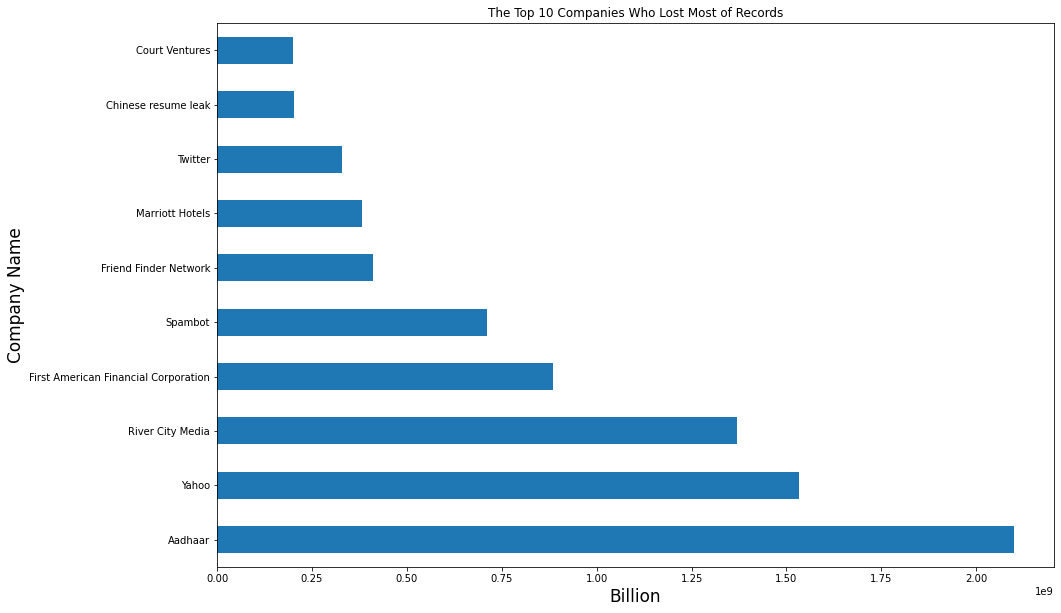

In [42]:
top10_Entity.plot(kind="barh", figsize=(15, 10))
plt.title("The Top 10 Companies Who Lost Most of Records")
plt.xlabel(xlabel="Billion", fontsize=17)
plt.ylabel(ylabel="Company Name", fontsize=17)

In [43]:
# Group by the Sector
Sector_Group = breach.groupby(by=["Sector"], axis=0)

In [44]:
top5_Sector = Sector_Group.sum()["Records Lost"].sort_values(ascending=False).head(n=5)

In [45]:
top5_Sector.to_frame()

,Records Lost
Sector,
web,6.795647e+09
government,2.318627e+09
financial,1.738829e+09
app,1.010149e+09
retail,8.044784e+08


Text(0.5, 0, 'Sector Name')

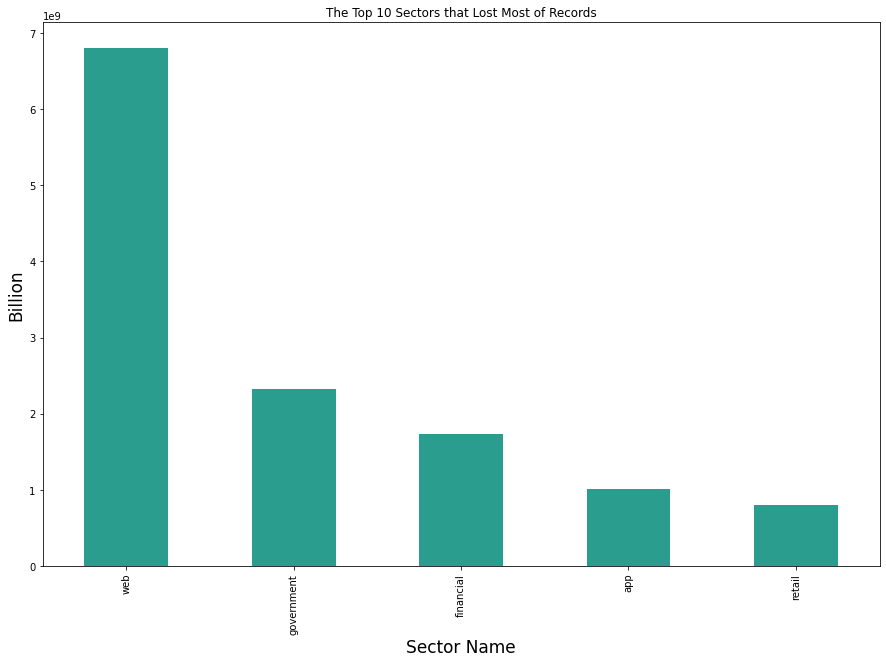

In [46]:
top5_Sector.plot(kind="bar", figsize=(15, 10), color="#2a9d8f")
plt.title("The Top 10 Sectors that Lost Most of Records")
plt.ylabel(ylabel="Billion", fontsize=17)
plt.xlabel(xlabel="Sector Name", fontsize=17)

In [47]:
# Group by the Method
Method_Group = breach.groupby(by=["Method"], axis=0)

In [48]:
Method = Method_Group.sum()["Records Lost"]

In [49]:
Method.to_frame()

,Records Lost
Method,
hacked,6.477003e+09
inside job,3.608414e+08
lost device,2.158752e+08
oops!,2.442315e+09
poor security,4.052873e+09


In [50]:
Method.to_frame().index

CategoricalIndex(['hacked', 'inside job', 'lost device ', 'oops!',
                  'poor security'],
                 categories=['hacked', 'inside job', 'lost device ', 'oops!', 'poor security'], ordered=False, name='Method', dtype='category')

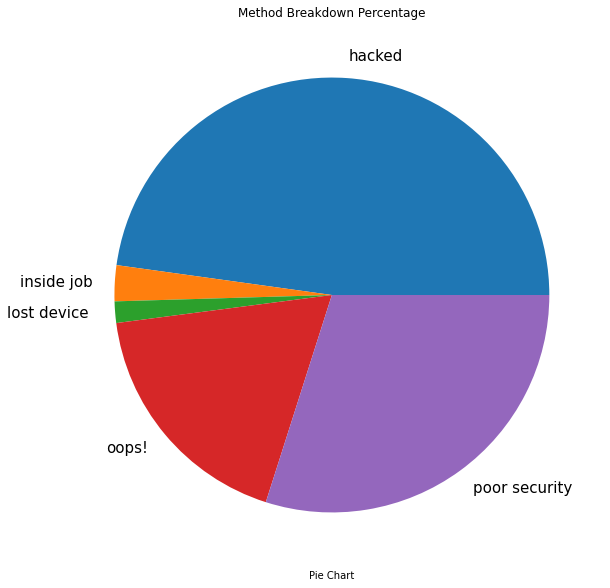

In [51]:
# Font size of text in pie chart
textprops = {"fontsize":15} 

# Creating plot 
fig = plt.figure(figsize =(15, 10)) 
plt.pie(Method, labels = Method.to_frame().index, textprops = textprops) 


# Showing plot 
plt.title(label="Method Breakdown Percentage")
plt.xlabel(xlabel="Pie Chart")
plt.show() 

In [52]:
# Group by the Year
Year_Group = breach.groupby(by=["Year"], axis=0)

In [53]:
Year = Year_Group.sum()["Records Lost"]

In [54]:
Year.to_frame()

,Records Lost
Year,
1999,1.800000e+06
2004,9.200000e+07
2005,4.410000e+07
2006,5.082500e+07
2007,1.505974e+08
2008,8.845550e+07
2009,2.541528e+08
2010,1.054928e+07
2011,2.008417e+08


Text(0, 0.5, 'Billion')

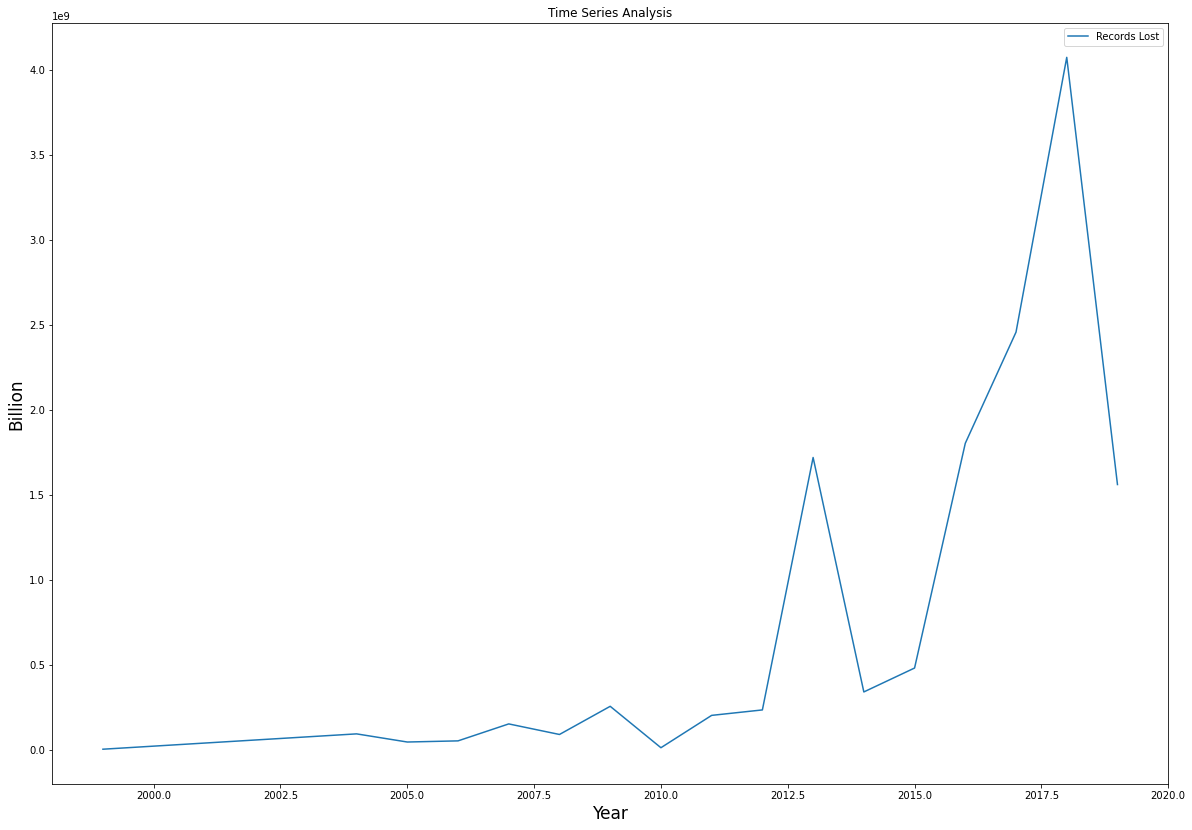

In [55]:
# textprops = {"fontsize":18} 

Year.to_frame().plot(kind="line", figsize=(20, 14))
plt.title("Time Series Analysis")
plt.xlabel(xlabel="Year", fontsize=17)
plt.ylabel(ylabel="Billion", fontsize=17)

---
---